In [1]:
import os
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from lxml import etree

In [2]:
%matplotlib inline

In [3]:
cwd = os.getcwd()

In [4]:
os.chdir(cwd+"/romans-master")
titres_romans = os.listdir()

In [54]:
def est_canon(tree):
    if tree.find(".//profileDesc") is not None:
        profil = tree.find(".//profileDesc")
        if profil.get("tag") == "canon":
            return True
        else:
            return False

In [60]:
def calcul_canonicitee(titres_romans):
    canon = 0
    canonicitee = 0
    for i in range(len(titres_romans)):
        with open(titres_romans[i],encoding="utf8") as xmlfile:
            tree = etree.parse(xmlfile)
            canon += est_canon(tree)
    canonicitee = (canon/len(titres_romans))*100
    return canonicitee

In [58]:
canonicitee = calcul_canonicitee(titres_romans)

In [59]:
print(canonicitee)

39.00134952766532


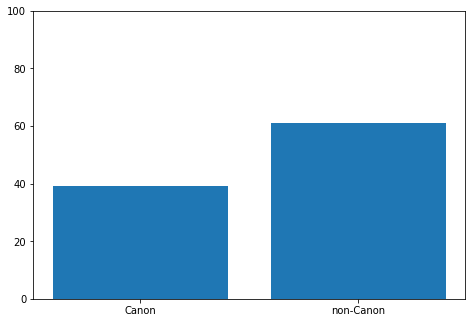

In [10]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
cano = ['Canon', 'non-Canon']
pourcent = [canonicitee,100-canonicitee]
ax.bar(cano,pourcent)
plt.ylim([0, 100])
plt.show()

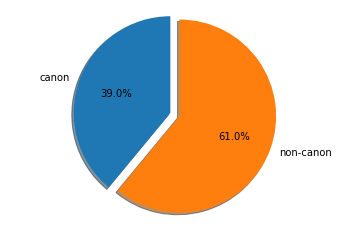

In [11]:
labels = 'canon', 'non-canon'
sizes = [canonicitee, 100-canonicitee]
explode = (0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

In [191]:
def calcul_canonicitee_dizaine(titres_romans):
    canon = 0
    tout = 0
    canon_dizaine = []
    tout_dizaine = []
    list_dizaine = []
    dizaine_deja_vu = []
    for i in range(len(titres_romans)):
            with open(titres_romans[i],encoding="utf8") as xmlfile:
                tout += 1
                tree = etree.parse(xmlfile)
                canon += est_canon(tree)
                if titres_romans[i][0:4] != "19XX" and titres_romans[i][0:3] != "181" and int(titres_romans[i][0:3]) not in dizaine_deja_vu:
                    print(titres_romans[i])
                    if int(titres_romans[i][0:4]) % 10 == 0:
                        list_dizaine.append(int(titres_romans[i][0:4]))
                    else:
                        list_dizaine.append(int(titres_romans[i][0:4])-1)
                    dizaine_deja_vu.append(int(titres_romans[i][0:3]))
                    tout_dizaine.append(tout)
                    canon_dizaine.append(canon)
                    canon = 0
                    tout = 0
    return canon_dizaine, tout_dizaine, list_dizaine

In [192]:
canon_dizaine, tout_dizaine, list_dizaine = calcul_canonicitee_dizaine(titres_romans)

1821_Arlincourt-Charles-Victor_Le-Solitaire.xml
1830_Merimee-Prosper_La-Partie-de-Trictrac.xml
1840_Dumas-Alexandre_Le-Capitaine-Pamphile.xml
1850_Bassanville-Anais-de_Le-Soir-et-le-matin-de-la-vie-ou-Conseils-aux-jeunes-filles.xml
1860_Assollant-Alfred_Histoire-fantastique-du-celebre-Pierrot.xml
1870_Daudet-Alphonse_Le-Nabab.xml
1880_Assollant-Alfred_Hyacinthe.xml
1890_Bazin-Rene_Les-Noellet.xml
1900_Allais-Alphonse_Ne-nous-frappons-pas.xml
1910_Audoux-Marguerite_Marie-Claire.xml
1920_Audoux-Marguerite_L-atelier-de-Marie-Claire.xml
1930_Bernede-Arthur_L-Homme-au-masque-de-fer.xml
1940_Delly_Le-drame-de-l'étang-aux-biches.xml
1950_Bernanos-Georges_Un-mauvais-reve.xml
1960_Bealu-Marcel_Contes-du-demi-sommeil.xml
1970_Beckett-Samuel_Le-Depeupleur.xml
1980_A.D.G._Pour-venger-Pepere.xml
1990_Daeninckx-Didier_Le-facteur-fatal.xml
2000_Beigbeder-Frederic_99-Francs.xml
2010_Bauchau-Henry_Deluge.xml
2020_Melois-Clementine_Dehors-la-tempete.xml


In [194]:
print(tout_dizaine)
print(canon_dizaine)
print(list_dizaine)

[18, 29, 83, 209, 158, 224, 281, 316, 209, 149, 117, 156, 105, 75, 156, 103, 97, 77, 108, 148, 145]
[2, 9, 38, 159, 64, 40, 52, 85, 64, 43, 31, 59, 64, 43, 52, 42, 42, 53, 73, 82, 59]
[1820, 1830, 1840, 1850, 1860, 1870, 1880, 1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]


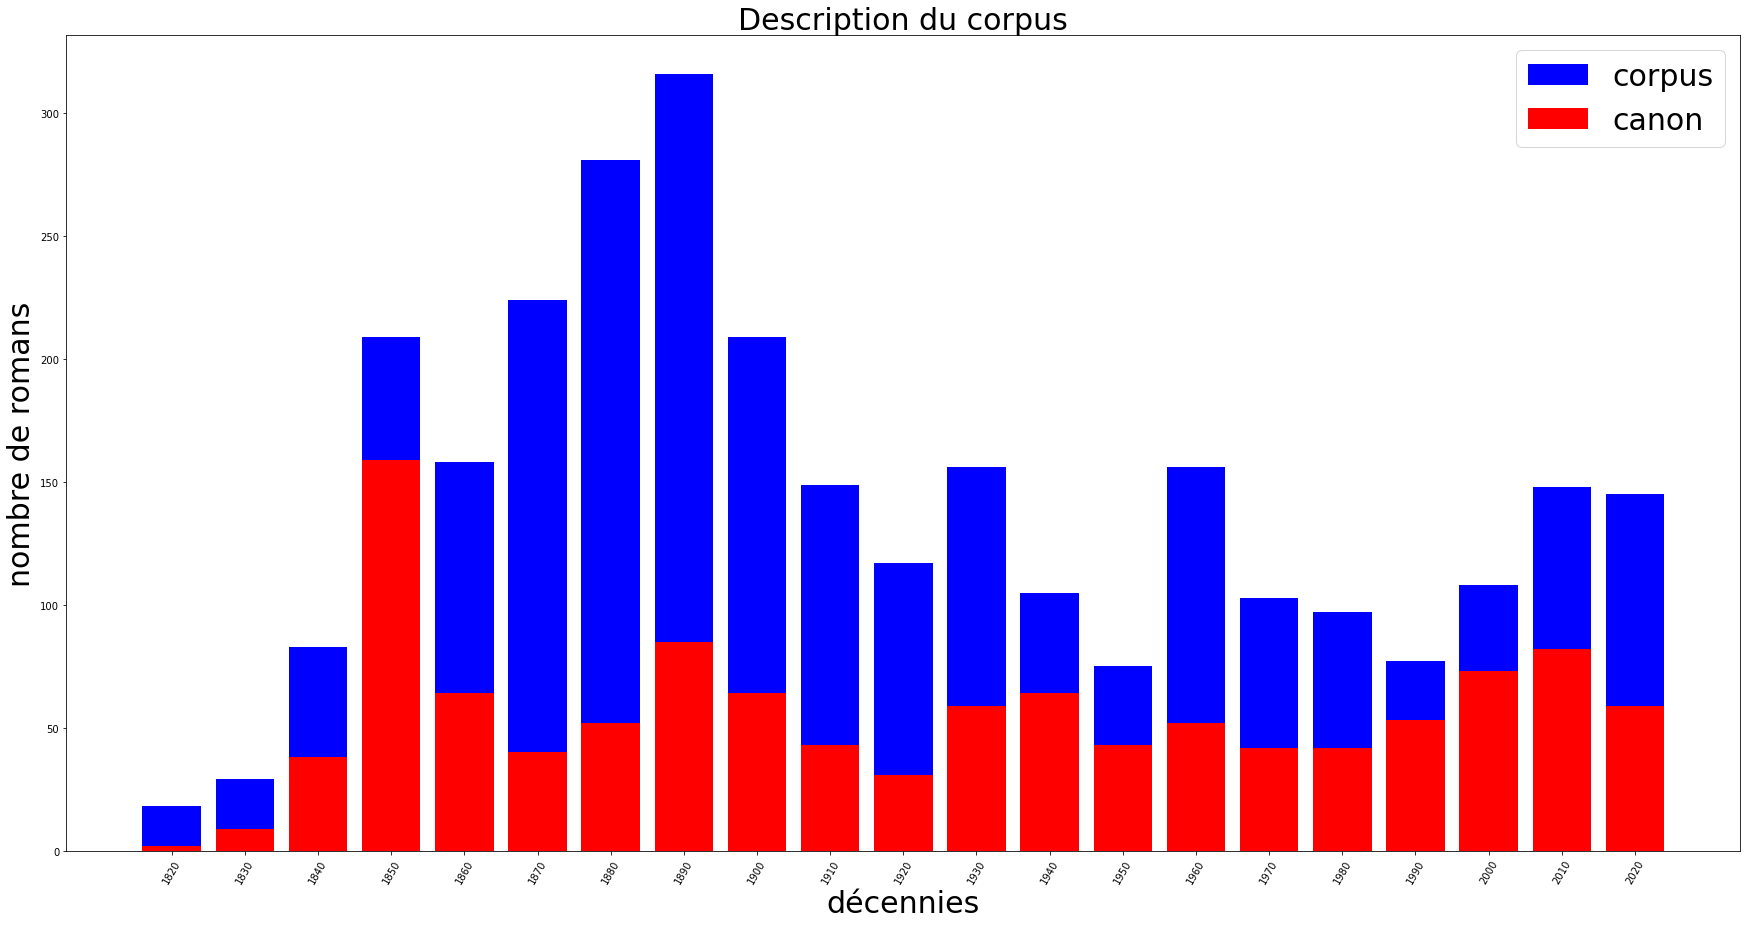

In [195]:
plt.figure(figsize=(30,15))
plt.bar(list_dizaine, tout_dizaine, 8, color='b', label='corpus')
plt.bar(list_dizaine, canon_dizaine, 8, color='r', label='canon')
plt.xticks(list_dizaine, rotation=60)
plt.ylabel('nombre de romans', fontsize=30)
plt.xlabel('décennies', fontsize=30)
plt.title('Description du corpus', fontsize=30)
plt.legend(prop={'size': 30})
plt.show()